In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#Importing Penguin Cleaned data set from git hub account

In [ ]:
penguin = pd.read_csv("https://raw.githubusercontent.com/Manju410/MLPractice/main/data/Penguin.csv")
penguin.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,0,0,0.254545,0.666667,0.152542,0.291667,0
1,0,0,0.269091,0.511905,0.237288,0.305556,1
2,0,0,0.298182,0.583333,0.389831,0.152778,1
3,0,0,0.429888,0.482282,0.490088,0.417154,0
4,0,0,0.167273,0.738095,0.355932,0.208333,1


# Rows and Columns of penguin data set

In [ ]:
penguin.shape

(344, 7)

# Checking Null values in penguin data set

In [ ]:
penguin.isna().sum()

species              0
island               0
bill_length_mm       0
bill_depth_mm        0
flipper_length_mm    0
body_mass_g          0
sex                  0
dtype: int64

# Independent and dependent variables of penguin data set

In [ ]:
X = penguin.drop("species",axis=1)
y = penguin.species

In [ ]:
X.shape,y.shape

((344, 6), (344,))

# KNN Classifier Model

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
knn_classifier = KNeighborsClassifier(n_neighbors=3)

In [ ]:
knn_classifier

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

# Cross validation using default parameters with cv=10

In [ ]:
from sklearn.model_selection import cross_val_score

In [ ]:
model_score = cross_val_score(knn_classifier,X,y,scoring='accuracy',cv=10)
model_score

array([1.        , 1.        , 0.96413934, 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 0.8129813 ])

In [ ]:
model_score.mean()

0.9777120642392108

# Cross validation score for value of cv from 2 to 20 and finding mean of scores

In [ ]:
mean_scores = {}
for n_fold in range(2,20):
  score = cross_val_score(knn_classifier,X,y,scoring='accuaracy',cv=n_fold)
  mean_scores[n_fold]=score.mean()

In [ ]:
mean_scores

{2: 0.9780798640611725,
 3: 0.9815749215912689,
 4: 0.9744265080713679,
 5: 0.9814334881764039,
 6: 0.9708748316717277,
 7: 0.9778867587057437,
 8: 0.9783182770467674,
 9: 0.9776598499657495,
 10: 0.9777120642392108,
 11: 0.9774448361404883,
 12: 0.9772640734780911,
 13: 0.9779249233202288,
 14: 0.9775614650326633,
 15: 0.9777773566352027,
 16: 0.9780583581747306,
 17: 0.9778481012658228,
 18: 0.9778977569118416,
 19: 0.9785708875859153}

In [ ]:
max(zip(mean_scores.values(), mean_scores.keys()))

(0.9815749215912689, 3)

# From cross validation technique we found 3 is best cv value and max accuracy is 98%

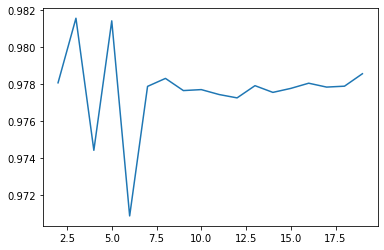

In [ ]:
plt.plot(list(mean_scores.keys()),list(mean_scores.values()))